# Week 1

# Introduction

I will be using the Foursquare data to clusterize different neighborhoods in my city, Santiago de Chile. This clusterization could be useful for many purposes, but I will focus my analysis on its real estate implications, hopefully getting an answer to the following question: if a new real estate appears to market, which would be a good description of its neighborhood and which type of people would be interested in renting a property there?.

The features feeding my algorithm will be the relative abundance of the different type of venues cataloged by the Foursquare API.

The potential stake-holders for my analysis could be real estate agents looking for a high-level quantitative look of the neighborhoods they have in their portfolio. It could also serve people looking to rent in Santiago who want a general notion of the types of neighborhoods in the city, which can be useful to narrow and optimize their search.

# Data

Foursquare provides data about the venues around a specific gps coordinate, as well as reviews and other features. I will combine said data with a catalog containing the coordinates of the main neighborhoods in Santiago, extracted from google maps.

# Week 2

# Methodology

The coordinates of the neighborhoods was obtained from this custom [google map](https://maps.google.com/maps/ms?ie=UTF8&oe=UTF8&msa=0&msid=201859164663359875721.00046955cd791cb37cca3). Its noteworthy that the coordinates aren't readily available, and they had to be extracted via [RegEx](https://docs.python.org/3/library/re.html) from the soruce code.

In the folowing code, the variable 'barrio' contatins the sourcecode from the aforementioned map. 'm3'

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 10)

In [3]:
dataSantiago = pd.read_csv('dataSantiago.csv')
dataSantiago = dataSantiago.loc[:,'neighborhood':'longitude']
dataSantiago.head()

,neighborhood,latitude,longitude
0,Barrio Concha y Toro,-33.445770,-70.665985
1,Barrio Las Flores SA,-33.406140,-70.577350
2,Barrio Plaza,-33.353820,-70.720764
3,Barrio el Golf,-33.413998,-70.592180
4,Barrio Pedro de Valdivia Norte,-33.418150,-70.616010


despues de la celda 95 comienzan problemas que no voy a solucionar :)

Now we pass the data into folium and foursquare

In [4]:
import folium # map rendering library

# create map of Santiago using latitude and longitude values
latitude = -33.437778
longitude = -70.650278

map_santiago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(dataSantiago['latitude'], dataSantiago['longitude'], dataSantiago['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
    
map_santiago

Now we go into foursquare

In [5]:
santiago_venues = pd.read_csv('santiago_venues.csv')
santiago_venues = santiago_venues.loc[:,'Neighborhood':'Venue Category']
santiago_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barrio Concha y Toro,-33.44577,-70.665985,Café Forastero,-33.445496,-70.667706,Coffee Shop
1,Barrio Concha y Toro,-33.44577,-70.665985,Pastelería Creme Caramel,-33.445200,-70.668089,Pie Shop
2,Barrio Concha y Toro,-33.44577,-70.665985,Il divertimento,-33.444991,-70.664819,Bar
3,Barrio Concha y Toro,-33.44577,-70.665985,Sala Yuukti Yoga,-33.448026,-70.665228,Yoga Studio
4,Barrio Concha y Toro,-33.44577,-70.665985,Café Tales,-33.444978,-70.664848,Café


In [6]:
santiago_venues.groupby('Neighborhood').count().sort_values(by= 'Neighborhood Latitude', ascending = False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barrio París,100,100,100,100,100,100
Barrio El Bosque,100,100,100,100,100,100
Barrio Cívico,100,100,100,100,100,100
Barrio Tajamar,100,100,100,100,100,100
Barrio Suecia,100,100,100,100,100,100
...,...,...,...,...,...,...
Barrio Santa Maria de Maipu,2,2,2,2,2,2
Barrio San Damián,2,2,2,2,2,2
Barrio Venecia,1,1,1,1,1,1


In [106]:
santiago_venues.groupby('Neighborhood').count()['Venue']

Neighborhood
Barrio Aguirre Luco        7
Barrio Antigua Florida    11
Barrio Apoquindo          26
Barrio Arnet               6
Barrio Atacama             5
                          ..
Barrio Yungay             34
Barrio Zaror               7
Barrio del Pilar           7
Barrio el Golf            77
Barrio la reforma          5
Name: Venue, Length: 93, dtype: int64

In [57]:
hist(d)

<AxesSubplot:xlabel='Venue'>

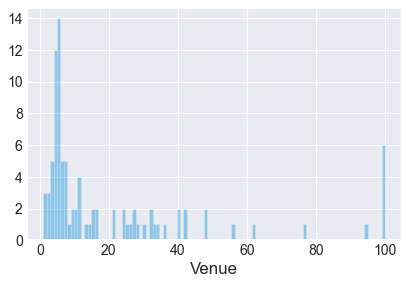

In [62]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(d, bins= 100, kde= False)

In [59]:
import matplotlib

filtramos para que queden con un minimo de 10 venues

In [63]:
min_num_venues = 10
filt = santiago_venues.groupby('Neighborhood').count()['Neighborhood Latitude']

santiago_venues.groupby('Neighborhood').count()[filt >= min_num_venues].sort_values('Neighborhood Latitude', ascending= False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barrio Tajamar,100,100,100,100,100,100
Barrio París,100,100,100,100,100,100
Barrio Londres,100,100,100,100,100,100
Barrio Suecia,100,100,100,100,100,100
Barrio Cívico,100,100,100,100,100,100
Barrio El Bosque,100,100,100,100,100,100
Barrio Bellavista,95,95,95,95,95,95
Barrio el Golf,77,77,77,77,77,77
Barrio Divina Providencia,62,62,62,62,62,62


In [64]:
santiago_venues.groupby('Neighborhood').count()[filt >= min_num_venues].sort_values('Neighborhood Latitude', ascending= False).shape

(43, 6)

Hacemos nuevo dataset con los barrios filtrados

In [65]:
filt2 = santiago_venues.groupby('Neighborhood').count()[filt >= min_num_venues].index

dataSantiago10 = dataSantiago[dataSantiago['neighborhood'].isin(filt2)].reset_index(drop=True)

In [66]:
dataSantiago10.head()

,neighborhood,latitude,longitude
0,Barrio Concha y Toro,-33.445770,-70.665985
1,Barrio Las Flores SA,-33.406140,-70.577350
2,Barrio el Golf,-33.413998,-70.592180
3,Barrio Pedro de Valdivia Norte,-33.418150,-70.616010
4,Barrio Londres,-33.444637,-70.648224


In [67]:
# create map of Santiago using latitude and longitude values
latitude = -33.437778
longitude = -70.650278

map_santiago10 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(dataSantiago10['latitude'], dataSantiago10['longitude'], dataSantiago10['neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago10)  
    
map_santiago10

In [68]:
santiago10_venues = santiago_venues[santiago_venues['Neighborhood'].isin(filt2)].reset_index(drop=True)
santiago10_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barrio Concha y Toro,-33.44577,-70.665985,Café Forastero,-33.445496,-70.667706,Coffee Shop
1,Barrio Concha y Toro,-33.44577,-70.665985,Pastelería Creme Caramel,-33.445200,-70.668089,Pie Shop
2,Barrio Concha y Toro,-33.44577,-70.665985,Il divertimento,-33.444991,-70.664819,Bar
3,Barrio Concha y Toro,-33.44577,-70.665985,Sala Yuukti Yoga,-33.448026,-70.665228,Yoga Studio
4,Barrio Concha y Toro,-33.44577,-70.665985,Café Tales,-33.444978,-70.664848,Café


In [69]:
santiago10_onehot = pd.get_dummies(santiago10_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
santiago10_onehot['Neighborhood'] = santiago10_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [santiago10_onehot.columns[-1]] + list(santiago10_onehot.columns[:-1])
santiago10_onehot = santiago10_onehot[fixed_columns]

santiago10_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
santiago10_grouped = santiago10_onehot.groupby('Neighborhood').sum().reset_index()
santiago10_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Toy / Game Store,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Barrio Antigua Florida,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barrio Apoquindo,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Barrio Balmaceda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barrio Bellavista,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Barrio Ciudad del Sol,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
santiago10_onehot.loc[:,santiago10_onehot.columns != 'Neighborhood'].sum().reset_index()

,index,0
0,Yoga Studio,8
1,Accessories Store,3
2,Adult Boutique,1
3,American Restaurant,6
4,Antique Shop,2
...,...,...
214,Video Game Store,1
215,Video Store,1
216,Vietnamese Restaurant,1
217,Wine Bar,4


In [181]:
total_venues = santiago10_onehot.loc[:,santiago10_onehot.columns != 'Neighborhood'].sum().reset_index()
total_venues = total_venues.rename(columns={0 : 'total'})

In [209]:
total_venues.sort_values('total', ascending = False).reset_index(drop = True).loc[0:20,:]

,index,total
0,Coffee Shop,80
1,Restaurant,76
2,Sandwich Place,66
3,Café,58
4,Pizza Place,53
5,Bakery,53
6,Bar,50
7,Hotel,45
8,Peruvian Restaurant,37
9,Sushi Restaurant,34


In [210]:
santiago10_onehot.loc[:,santiago10_onehot.columns != 'Neighborhood'].shape

(1723, 219)

In [71]:
num_top_venues = 5

for hood in santiago10_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = santiago10_grouped[santiago10_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barrio Antigua Florida----
                 venue  freq
0               Bakery   2.0
1                  Bar   1.0
2  Martial Arts School   1.0
3             Pharmacy   1.0
4       Farmers Market   1.0


----Barrio Apoquindo----
                 venue  freq
0       Sandwich Place   3.0
1               Bakery   3.0
2                 Pool   2.0
3           Restaurant   2.0
4  Sporting Goods Shop   2.0


----Barrio Balmaceda----
                  venue  freq
0   Peruvian Restaurant   4.0
1                   Bar   1.0
2  Fast Food Restaurant   1.0
3          Soccer Field   1.0
4                  Park   1.0


----Barrio Bellavista----
        venue  freq
0         Bar  10.0
1   Nightclub   8.0
2  Restaurant   7.0
3     Theater   7.0
4       Hotel   5.0


----Barrio Ciudad del Sol----
         venue  freq
0       Bakery   2.0
1        Plaza   2.0
2  Supermarket   1.0
3         Park   1.0
4     Pharmacy   1.0


----Barrio Concha y Toro----
              venue  freq
0               Bar   5.

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [73]:
import numpy as np

In [74]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = santiago10_grouped['Neighborhood']

for ind in np.arange(santiago10_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(santiago10_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Antigua Florida,Bakery,Gym,Martial Arts School,Farmers Market,Seafood Restaurant,Pharmacy,Japanese Restaurant,Dessert Shop,Accessories Store,Bar
1,Barrio Apoquindo,Bakery,Sandwich Place,Pool,Restaurant,Sporting Goods Shop,Sushi Restaurant,Pet Store,Peruvian Restaurant,Plaza,Coffee Shop
2,Barrio Balmaceda,Peruvian Restaurant,Dance Studio,BBQ Joint,Soccer Field,Mobile Phone Shop,South American Restaurant,Pizza Place,Skate Park,Seafood Restaurant,Fast Food Restaurant
3,Barrio Bellavista,Bar,Nightclub,Restaurant,Theater,Hotel,Sandwich Place,Hostel,South American Restaurant,Gastropub,Latin American Restaurant
4,Barrio Ciudad del Sol,Plaza,Bakery,Supermarket,Chinese Restaurant,Pharmacy,Sushi Restaurant,Asian Restaurant,Park,Wine Shop,Fast Food Restaurant


Clusterize neighborhoods

In [76]:
from sklearn.cluster import KMeans

In [77]:
santiago10_grouped_clustering = santiago10_grouped.drop('Neighborhood', 1)

In [78]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(santiago10_grouped_clustering)
    sse.append(kmeans.inertia_)

C:\Users\cacoh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [79]:
import matplotlib.pyplot as plt

In [80]:
from kneed import KneeLocator

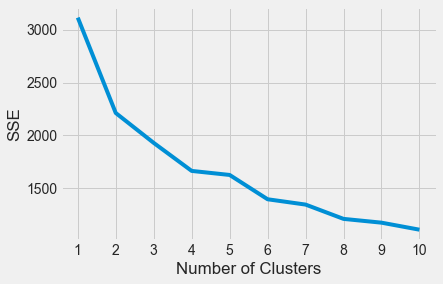

In [81]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [82]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

6

In [83]:
from sklearn.metrics import silhouette_score

In [84]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(santiago10_grouped_clustering)
    score = silhouette_score(santiago10_grouped_clustering, kmeans.labels_)
    silhouette_coefficients.append(score)

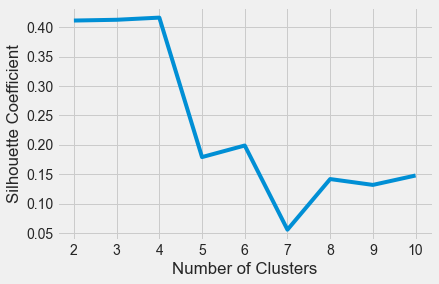

In [85]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [86]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(santiago10_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 2, 0, 0, 1, 3, 3, 0])

In [87]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Antigua Florida,Bakery,Gym,Martial Arts School,Farmers Market,Seafood Restaurant,Pharmacy,Japanese Restaurant,Dessert Shop,Accessories Store,Bar
1,Barrio Apoquindo,Bakery,Sandwich Place,Pool,Restaurant,Sporting Goods Shop,Sushi Restaurant,Pet Store,Peruvian Restaurant,Plaza,Coffee Shop
2,Barrio Balmaceda,Peruvian Restaurant,Dance Studio,BBQ Joint,Soccer Field,Mobile Phone Shop,South American Restaurant,Pizza Place,Skate Park,Seafood Restaurant,Fast Food Restaurant
3,Barrio Bellavista,Bar,Nightclub,Restaurant,Theater,Hotel,Sandwich Place,Hostel,South American Restaurant,Gastropub,Latin American Restaurant
4,Barrio Ciudad del Sol,Plaza,Bakery,Supermarket,Chinese Restaurant,Pharmacy,Sushi Restaurant,Asian Restaurant,Park,Wine Shop,Fast Food Restaurant


In [88]:
#neighborhoods_venues_sorted.drop('Cluster Labels',axis=  'columns', inplace= True)

In [89]:
# add clustering labels
try:
   neighborhoods_venues_sorted.drop('Cluster Labels',axis=  'columns', inplace= True)
except:
    print('Appending cluster labels')
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

santiago10_merged = dataSantiago10[:]

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
santiago10_merged = santiago10_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='neighborhood')

santiago10_merged.head() # check the last columns!

Appending cluster labels


,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barrio Concha y Toro,-33.445770,-70.665985,0,Bar,Hotel,Arepa Restaurant,Pub,Italian Restaurant,Restaurant,Plaza,Pizza Place,Pie Shop,Other Nightlife
1,Barrio Las Flores SA,-33.406140,-70.577350,0,Clothing Store,Cosmetics Shop,Park,Vegetarian / Vegan Restaurant,Tea Room,Men's Store,Shoe Store,Sporting Goods Shop,Bistro,Spa
2,Barrio el Golf,-33.413998,-70.592180,3,Coffee Shop,Restaurant,Sandwich Place,Bakery,Cosmetics Shop,Café,Pharmacy,Salad Place,Plaza,South American Restaurant
3,Barrio Pedro de Valdivia Norte,-33.418150,-70.616010,0,Coffee Shop,Park,Athletics & Sports,Café,Sporting Goods Shop,South American Restaurant,Buffet,Shoe Store,Cafeteria,Sculpture Garden
4,Barrio Londres,-33.444637,-70.648224,1,Coffee Shop,Sandwich Place,Pizza Place,Bookstore,Chinese Restaurant,Theater,Plaza,Restaurant,Café,Gym


In [90]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [255]:
mapColor = {0 : 0, 
            1 : 1, 
            2 : 2,
            3 : 4}

In [256]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow.append('#999999')

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(santiago10_merged['latitude'], santiago10_merged['longitude'], santiago10_merged['neighborhood'], santiago10_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[mapColor[cluster]-1],
        fill=True,
        fill_color=rainbow[mapColor[cluster]-1],
        fill_opacity=.7).add_to(map_clusters)
       
map_clusters

In [251]:
dict1 = {0 : 0, 1 : 1, 
         2 : 2, #este es el polemico 
         3 : 4}

In [92]:
santiago10_merged_copy = santiago10_merged[:]

In [93]:
dictProb = {'1st Most Common Venue' : '1st Most Common Venue P',
           '2nd Most Common Venue' : '2nd Most Common Venue P',
           '3rd Most Common Venue' : '3rd Most Common Venue P',
            '4th Most Common Venue' : '4th Most Common Venue P',
            '5th Most Common Venue' : '5th Most Common Venue P',
            '6th Most Common Venue' : '6th Most Common Venue P',
            '7th Most Common Venue' : '7th Most Common Venue P',
            '8th Most Common Venue' : '8th Most Common Venue P',
            '9th Most Common Venue' : '9th Most Common Venue P',
            '10th Most Common Venue' : '10th Most Common Venue P',
           }

In [94]:
for key, value in dictProb.items():
    print(key + ': ' + value)

1st Most Common Venue: 1st Most Common Venue P
2nd Most Common Venue: 2nd Most Common Venue P
3rd Most Common Venue: 3rd Most Common Venue P
4th Most Common Venue: 4th Most Common Venue P
5th Most Common Venue: 5th Most Common Venue P
6th Most Common Venue: 6th Most Common Venue P
7th Most Common Venue: 7th Most Common Venue P
8th Most Common Venue: 8th Most Common Venue P
9th Most Common Venue: 9th Most Common Venue P
10th Most Common Venue: 10th Most Common Venue P


In [95]:
for value in dictProb.values():
    santiago10_merged_copy[value] = None


<ipython-input-95-efb352339141>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santiago10_merged_copy[value] = None


In [96]:
santiago10_merged_copy.head()

,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,...,1st Most Common Venue P,2nd Most Common Venue P,3rd Most Common Venue P,4th Most Common Venue P,5th Most Common Venue P,6th Most Common Venue P,7th Most Common Venue P,8th Most Common Venue P,9th Most Common Venue P,10th Most Common Venue P
0,Barrio Concha y Toro,-33.445770,-70.665985,0,Bar,Hotel,Arepa Restaurant,Pub,Italian Restaurant,Restaurant,...,None,None,None,None,None,None,None,None,None,None
1,Barrio Las Flores SA,-33.406140,-70.577350,0,Clothing Store,Cosmetics Shop,Park,Vegetarian / Vegan Restaurant,Tea Room,Men's Store,...,None,None,None,None,None,None,None,None,None,None
2,Barrio el Golf,-33.413998,-70.592180,3,Coffee Shop,Restaurant,Sandwich Place,Bakery,Cosmetics Shop,Café,...,None,None,None,None,None,None,None,None,None,None
3,Barrio Pedro de Valdivia Norte,-33.418150,-70.616010,0,Coffee Shop,Park,Athletics & Sports,Café,Sporting Goods Shop,South American Restaurant,...,None,None,None,None,None,None,None,None,None,None
4,Barrio Londres,-33.444637,-70.648224,1,Coffee Shop,Sandwich Place,Pizza Place,Bookstore,Chinese Restaurant,Theater,...,None,None,None,None,None,None,None,None,None,None


In [97]:
for neigh, neighP in dictProb.items():
    for row in range(len(santiago10_merged_copy)):
        barrio = santiago10_merged_copy.loc[row,'neighborhood']   
        venue = santiago10_merged_copy.loc[row, neigh]
        p = santiago10_grouped[santiago10_grouped.Neighborhood == barrio][venue].reset_index(drop = True)[0]
        santiago10_merged_copy.loc[row, neighP] = p
        print(barrio + ', ' + venue + ': ' + str(x))

Barrio Concha y Toro, Bar: [0 1 2 3]
Barrio Las Flores SA, Clothing Store: [0 1 2 3]
Barrio el Golf, Coffee Shop: [0 1 2 3]
Barrio Pedro de Valdivia Norte, Coffee Shop: [0 1 2 3]
Barrio Londres, Coffee Shop: [0 1 2 3]
Barrio Lastarria, Coffee Shop: [0 1 2 3]
Barrio San Borja, Art Gallery: [0 1 2 3]
Barrio San Isidro, Sushi Restaurant: [0 1 2 3]
Barrio Cívico, Coffee Shop: [0 1 2 3]
Barrio Franklin, Sandwich Place: [0 1 2 3]
Barrio Huemul 1, Bakery: [0 1 2 3]
Barrio Los Descubridores, Bakery: [0 1 2 3]
Barrio Vaticano, Bakery: [0 1 2 3]
Barrio La Capitanía, Café: [0 1 2 3]
Barrio Escandinavia, Pizza Place: [0 1 2 3]
Barrio Tajamar, Café: [0 1 2 3]
Barrio San Pascual, Italian Restaurant: [0 1 2 3]
Barrio Lyon, Hotel: [0 1 2 3]
Barrio Divina Providencia, Coffee Shop: [0 1 2 3]
Barrio Los Domínicos, Pharmacy: [0 1 2 3]
Barrio Madrid, Chinese Restaurant: [0 1 2 3]
Barrio Patronato, Middle Eastern Restaurant: [0 1 2 3]
Barrio Sierra Bella, BBQ Joint: [0 1 2 3]
Barrio Balmaceda, Peruvian Rest

C:\Users\cacoh\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Barrio Divina Providencia, Restaurant: [0 1 2 3]
Barrio Los Domínicos, Restaurant: [0 1 2 3]
Barrio Madrid, Sandwich Place: [0 1 2 3]
Barrio Patronato, Korean Restaurant: [0 1 2 3]
Barrio Sierra Bella, Italian Restaurant: [0 1 2 3]
Barrio Balmaceda, Dance Studio: [0 1 2 3]
Barrio Villa Moderna, Restaurant: [0 1 2 3]
Barrio San Bernardo, Sushi Restaurant: [0 1 2 3]
Barrio Esmeralda, Bar: [0 1 2 3]
Barrio Elías de la Cruz, Pizza Place: [0 1 2 3]
Barrio Antigua Florida, Gym: [0 1 2 3]
Barrio República, Pizza Place: [0 1 2 3]
Barrio Meiggs, Sandwich Place: [0 1 2 3]
Barrio Exposición, Electronics Store: [0 1 2 3]
Barrio Ciudad del Sol, Bakery: [0 1 2 3]
Barrio El Bosque, Hotel: [0 1 2 3]
Barrio Suecia, Bookstore: [0 1 2 3]
Barrio Manuel Montt, Pizza Place: [0 1 2 3]
Barrio Italia, Pizza Place: [0 1 2 3]
Barrio Bellavista, Nightclub: [0 1 2 3]
Barrio Apoquindo, Sandwich Place: [0 1 2 3]
Barrio San Diego, Flea Market: [0 1 2 3]
Barrio París, Sandwich Place: [0 1 2 3]
Barrio Yungay, Museum: [

Barrio Manuel Montt, Buffet: [0 1 2 3]
Barrio Italia, Ice Cream Shop: [0 1 2 3]
Barrio Bellavista, South American Restaurant: [0 1 2 3]
Barrio Apoquindo, Peruvian Restaurant: [0 1 2 3]
Barrio San Diego, Asian Restaurant: [0 1 2 3]
Barrio París, Restaurant: [0 1 2 3]
Barrio Yungay, Food Truck: [0 1 2 3]
Barrio Estacion, Chinese Restaurant: [0 1 2 3]
Barrio Concha y Toro, Pie Shop: [0 1 2 3]
Barrio Las Flores SA, Bistro: [0 1 2 3]
Barrio el Golf, Plaza: [0 1 2 3]
Barrio Pedro de Valdivia Norte, Cafeteria: [0 1 2 3]
Barrio Londres, Café: [0 1 2 3]
Barrio Lastarria, Bookstore: [0 1 2 3]
Barrio San Borja, Burger Joint: [0 1 2 3]
Barrio San Isidro, Chinese Restaurant: [0 1 2 3]
Barrio Cívico, Gym: [0 1 2 3]
Barrio Franklin, Latin American Restaurant: [0 1 2 3]
Barrio Huemul 1, Pharmacy: [0 1 2 3]
Barrio Los Descubridores, Sandwich Place: [0 1 2 3]
Barrio Vaticano, Gym: [0 1 2 3]
Barrio La Capitanía, Park: [0 1 2 3]
Barrio Escandinavia, Bar: [0 1 2 3]
Barrio Tajamar, Seafood Restaurant: [0 1 

In [98]:
santiago10_merged_copy = santiago10_merged_copy.loc[:, 
                            ['neighborhood', 'latitude','longitude','Cluster Labels',
                              '1st Most Common Venue', '1st Most Common Venue P',
                              '2nd Most Common Venue', '2nd Most Common Venue P',
                              '3rd Most Common Venue', '3rd Most Common Venue P',
                              '4th Most Common Venue', '4th Most Common Venue P',
                              '5th Most Common Venue', '5th Most Common Venue P',
                              '6th Most Common Venue', '6th Most Common Venue P',
                              '7th Most Common Venue', '7th Most Common Venue P',
                              '8th Most Common Venue', '8th Most Common Venue P',
                              '9th Most Common Venue', '9th Most Common Venue P',
                              '10th Most Common Venue', '10th Most Common Venue P']]

In [99]:
santiago10_merged_copy.head()

,neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,1st Most Common Venue P,2nd Most Common Venue,2nd Most Common Venue P,3rd Most Common Venue,3rd Most Common Venue P,...,6th Most Common Venue,6th Most Common Venue P,7th Most Common Venue,7th Most Common Venue P,8th Most Common Venue,8th Most Common Venue P,9th Most Common Venue,9th Most Common Venue P,10th Most Common Venue,10th Most Common Venue P
0,Barrio Concha y Toro,-33.445770,-70.665985,0,Bar,5,Hotel,2,Arepa Restaurant,2,...,Restaurant,1,Plaza,1,Pizza Place,1,Pie Shop,1,Other Nightlife,1
1,Barrio Las Flores SA,-33.406140,-70.577350,0,Clothing Store,5,Cosmetics Shop,3,Park,2,...,Men's Store,2,Shoe Store,1,Sporting Goods Shop,1,Bistro,1,Spa,1
2,Barrio el Golf,-33.413998,-70.592180,3,Coffee Shop,10,Restaurant,7,Sandwich Place,5,...,Café,4,Pharmacy,4,Salad Place,3,Plaza,3,South American Restaurant,2
3,Barrio Pedro de Valdivia Norte,-33.418150,-70.616010,0,Coffee Shop,2,Park,2,Athletics & Sports,2,...,South American Restaurant,1,Buffet,1,Shoe Store,1,Cafeteria,1,Sculpture Garden,1
4,Barrio Londres,-33.444637,-70.648224,1,Coffee Shop,8,Sandwich Place,6,Pizza Place,6,...,Theater,4,Plaza,4,Restaurant,4,Café,4,Gym,4


In [100]:
santiago10_merged = santiago10_merged_copy[:]

In [101]:
pd.set_option('display.max_rows', 50)

In [102]:
#rojo
santiago10_merged.loc[santiago10_merged['Cluster Labels'] == 0, santiago10_merged.columns[[0] + list(range(4, santiago10_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,1st Most Common Venue P,2nd Most Common Venue,2nd Most Common Venue P,3rd Most Common Venue,3rd Most Common Venue P,4th Most Common Venue,4th Most Common Venue P,5th Most Common Venue,...,6th Most Common Venue,6th Most Common Venue P,7th Most Common Venue,7th Most Common Venue P,8th Most Common Venue,8th Most Common Venue P,9th Most Common Venue,9th Most Common Venue P,10th Most Common Venue,10th Most Common Venue P
0,Barrio Concha y Toro,Bar,5,Hotel,2,Arepa Restaurant,2,Pub,2,Italian Restaurant,...,Restaurant,1,Plaza,1,Pizza Place,1,Pie Shop,1,Other Nightlife,1
1,Barrio Las Flores SA,Clothing Store,5,Cosmetics Shop,3,Park,2,Vegetarian / Vegan Restaurant,2,Tea Room,...,Men's Store,2,Shoe Store,1,Sporting Goods Shop,1,Bistro,1,Spa,1
3,Barrio Pedro de Valdivia Norte,Coffee Shop,2,Park,2,Athletics & Sports,2,Café,1,Sporting Goods Shop,...,South American Restaurant,1,Buffet,1,Shoe Store,1,Cafeteria,1,Sculpture Garden,1
5,Barrio Lastarria,Coffee Shop,3,Hotel,2,Burger Joint,2,Gift Shop,2,Hostel,...,Art Gallery,2,Art Museum,2,Fountain,2,Bookstore,2,Park,2
6,Barrio San Borja,Art Gallery,2,Gift Shop,2,Park,2,Hotel,2,Coffee Shop,...,Fountain,2,Sandwich Place,2,Scenic Lookout,1,Burger Joint,1,Miscellaneous Shop,1
7,Barrio San Isidro,Sushi Restaurant,5,Pizza Place,4,Restaurant,2,Peruvian Restaurant,2,Fried Chicken Joint,...,Latin American Restaurant,2,Seafood Restaurant,1,Food & Drink Shop,1,Chinese Restaurant,1,Burger Joint,1
9,Barrio Franklin,Sandwich Place,3,Flea Market,3,Thai Restaurant,3,Falafel Restaurant,2,Peruvian Restaurant,...,Mexican Restaurant,2,Seafood Restaurant,2,Restaurant,2,Latin American Restaurant,1,Candy Store,1
10,Barrio Huemul 1,Bakery,2,Flea Market,1,Nightclub,1,Supermarket,1,Theater,...,Restaurant,1,Peruvian Restaurant,1,Gastropub,1,Pharmacy,1,Plaza,1
11,Barrio Los Descubridores,Bakery,3,Plaza,2,Accessories Store,1,Arts & Entertainment,1,Food & Drink Shop,...,Farmers Market,1,Chinese Restaurant,1,Martial Arts School,1,Sandwich Place,1,Park,1
12,Barrio Vaticano,Bakery,2,Spa,2,Peruvian Restaurant,1,Farmers Market,1,Medical Center,...,Chinese Restaurant,1,Bar,1,Park,1,Gym,1,Coffee Shop,1


In [103]:
#morado
santiago10_merged.loc[santiago10_merged['Cluster Labels'] == 1, santiago10_merged.columns[[0] + list(range(4, santiago10_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,1st Most Common Venue P,2nd Most Common Venue,2nd Most Common Venue P,3rd Most Common Venue,3rd Most Common Venue P,4th Most Common Venue,4th Most Common Venue P,5th Most Common Venue,...,6th Most Common Venue,6th Most Common Venue P,7th Most Common Venue,7th Most Common Venue P,8th Most Common Venue,8th Most Common Venue P,9th Most Common Venue,9th Most Common Venue P,10th Most Common Venue,10th Most Common Venue P
4,Barrio Londres,Coffee Shop,8,Sandwich Place,6,Pizza Place,6,Bookstore,5,Chinese Restaurant,...,Theater,4,Plaza,4,Restaurant,4,Café,4,Gym,4
8,Barrio Cívico,Coffee Shop,8,Café,7,Restaurant,6,Bookstore,6,Sandwich Place,...,Plaza,5,Bakery,4,Theater,4,Gym,3,Candy Store,2
40,Barrio París,Coffee Shop,8,Sandwich Place,6,Pizza Place,6,Bookstore,5,Chinese Restaurant,...,Theater,4,Plaza,4,Restaurant,4,Café,4,Gym,4


In [104]:
#cian
santiago10_merged.loc[santiago10_merged['Cluster Labels'] == 2, santiago10_merged.columns[[0] + list(range(4, santiago10_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,1st Most Common Venue P,2nd Most Common Venue,2nd Most Common Venue P,3rd Most Common Venue,3rd Most Common Venue P,4th Most Common Venue,4th Most Common Venue P,5th Most Common Venue,...,6th Most Common Venue,6th Most Common Venue P,7th Most Common Venue,7th Most Common Venue P,8th Most Common Venue,8th Most Common Venue P,9th Most Common Venue,9th Most Common Venue P,10th Most Common Venue,10th Most Common Venue P
37,Barrio Bellavista,Bar,10,Nightclub,8,Restaurant,7,Theater,7,Hotel,...,Sandwich Place,4,Hostel,4,South American Restaurant,3,Gastropub,2,Latin American Restaurant,2


In [105]:
#verde
santiago10_merged.loc[santiago10_merged['Cluster Labels'] == 3, santiago10_merged.columns[[0] + list(range(4, santiago10_merged.shape[1]))]]

,neighborhood,1st Most Common Venue,1st Most Common Venue P,2nd Most Common Venue,2nd Most Common Venue P,3rd Most Common Venue,3rd Most Common Venue P,4th Most Common Venue,4th Most Common Venue P,5th Most Common Venue,...,6th Most Common Venue,6th Most Common Venue P,7th Most Common Venue,7th Most Common Venue P,8th Most Common Venue,8th Most Common Venue P,9th Most Common Venue,9th Most Common Venue P,10th Most Common Venue,10th Most Common Venue P
2,Barrio el Golf,Coffee Shop,10,Restaurant,7,Sandwich Place,5,Bakery,5,Cosmetics Shop,...,Café,4,Pharmacy,4,Salad Place,3,Plaza,3,South American Restaurant,2
15,Barrio Tajamar,Café,8,Hotel,6,Restaurant,6,Coffee Shop,5,Pizza Place,...,Sandwich Place,4,Gastropub,3,Burger Joint,3,Seafood Restaurant,3,Middle Eastern Restaurant,2
18,Barrio Divina Providencia,Coffee Shop,6,Restaurant,5,Café,5,Peruvian Restaurant,3,Pizza Place,...,Bakery,3,Yoga Studio,2,Bar,2,Sandwich Place,2,Middle Eastern Restaurant,2
33,Barrio El Bosque,Coffee Shop,8,Hotel,5,Clothing Store,5,Restaurant,4,Deli / Bodega,...,Bakery,3,Burger Joint,3,Ice Cream Shop,3,Pizza Place,2,Pharmacy,2
34,Barrio Suecia,Clothing Store,9,Bookstore,5,Ice Cream Shop,4,Gourmet Shop,4,Restaurant,...,Burger Joint,4,French Restaurant,4,Cosmetics Shop,3,Indian Restaurant,3,Hotel,3


# Results

# Discussion

# Conclusion